In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate

In [8]:
df = pd.read_csv('gasNetworkData.csv', sep=';')
df.columns

Index(['valve_1', 'valve_2', 'valve_3', 'valve_4', 'valve_5', 'valve_6',
       'valve_7', 'valve_8', 'valve_9', 'valve_10', 'valve_11', 'valve_12',
       'QGRS_1', 'QGRS_2', 'QPlant_1', 'QPlant_2', 'QPlant_3', 'QPlant_4',
       'PGRS_1', 'PGRS_2', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7',
       'P_8', 'P_9', 'Q_1', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'Q_6', 'Q_7'],
      dtype='object')

In [19]:
for i in range(df.shape[0]):
    df.iloc[i] = df.iloc[i].str.replace(',', '.')
df = df.astype('float')

In [20]:
data = np.asarray(df.values, dtype=np.float_)
u, s, v = np.linalg.svd(data)

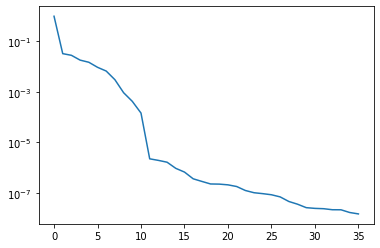

In [23]:
plt.plot(s/s[0])
plt.yscale('log')

In [84]:
# all_pq_cols = \
#     'P_1,P_2,P_3,P_4,P_7,P_8,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2'
# all_pq_cols = all_pq_cols.split(',')
all_pq_cols = ['QGRS_1', 'QGRS_2', 'QPlant_1', 'QPlant_2', 'QPlant_3', 'QPlant_4',
               'PGRS_1', 'PGRS_2', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7',
               'P_8', 'P_9', 'Q_1', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'Q_6', 'Q_7']
valves = ['valve_1', 'valve_2', 'valve_3', 'valve_4', 'valve_5', 'valve_6',
           'valve_7', 'valve_8', 'valve_9', 'valve_10', 'valve_11', 'valve_12']

### Predict P1

In [74]:
cols_for_p1 = ['valve_5', 'valve_2', 'valve_12', 'valve_1', 'valve_6']
data_p1 = df[cols_for_p1]
X = data_p1.values
y = df['P_1']

In [75]:
lin_reg = LinearRegression()
cv_result = cross_validate(lin_reg, X, y, scoring='r2', cv=10)
metrics = cv_result['test_score']
print(metrics.mean(), '±', metrics.std())

0.9221422326120026 ± 0.01355398703705371


In [81]:
rf = RandomForestRegressor(n_estimators=50, max_depth=10)
cv_result = cross_validate(rf, X, y, scoring='r2', cv=10, n_jobs=10)
metrics = cv_result['test_score']
print(metrics.mean(), '±', metrics.std())

0.9526405897097876 ± 0.006189190591739648


### Predict valve 3

In [69]:
# cols_for_v3 = ['P_8', 'Q_7', 'P_7']
cols_for_v3 = all_pq_cols
data_v3 = df[cols_for_v3]
X = data_v3.values
y = df['valve_3']

In [70]:
lin_reg = LinearRegression()
cv_result = cross_validate(lin_reg, X, y, scoring='r2', cv=10)
metrics = cv_result['test_score']
print(metrics.mean(), '±', metrics.std())

0.9058074370912272 ± 0.013915910586066631


In [71]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
cv_result = cross_validate(rf, X, y, scoring='r2', cv=10)
metrics = cv_result['test_score']
print(metrics.mean(), '±', metrics.std())

0.9689441238729707 ± 0.0020380641306383548


### Predict all valves

In [73]:
data_pq = df[all_pq_cols]
X = data_pq.values
valves = ['valve_1', 'valve_2', 'valve_3', 'valve_4', 'valve_5', 'valve_6',
       'valve_7', 'valve_8', 'valve_9', 'valve_10', 'valve_11', 'valve_12']
valve_results = {}
for valve in valves:
    lin_reg = LinearRegression()
    lr_res = cross_validate(lin_reg, X, df[valve], scoring='r2', cv=10)['test_score']
    rf = RandomForestRegressor(n_estimators=50, max_depth=10)
    rf_res = cross_validate(rf, X, df[valve], scoring='r2', cv=10)['test_score']
    valve_results[valve] = f'lr - {lr_res.mean():.4f} ± {lr_res.std():.4f} ; rf - {rf_res.mean():.4f} ± {rf_res.std():.4f}'
    print(f'{valve}: lr - {lr_res.mean():.4f} ± {lr_res.std():.4f} ; rf - {rf_res.mean():.4f} ± {rf_res.std():.4f}')
    

valve_1: lr - 0.9939 ± 0.0011 ; rf - 0.9998 ± 0.0001
valve_2: lr - 0.9945 ± 0.0007 ; rf - 0.9999 ± 0.0001
valve_3: lr - 0.9058 ± 0.0139 ; rf - 0.9675 ± 0.0035
valve_4: lr - 0.4760 ± 0.0898 ; rf - 0.4247 ± 0.1163
valve_5: lr - 0.9309 ± 0.0144 ; rf - 0.9860 ± 0.0019
valve_6: lr - 0.4451 ± 0.3122 ; rf - 0.3827 ± 0.1676
valve_7: lr - 0.4425 ± 0.1551 ; rf - 0.3659 ± 0.1589
valve_8: lr - 0.3162 ± 0.0617 ; rf - 0.2337 ± 0.0494
valve_9: lr - 0.6228 ± 0.0609 ; rf - 0.7226 ± 0.0582
valve_10: lr - 0.9194 ± 0.0089 ; rf - 0.9695 ± 0.0051
valve_11: lr - 0.9511 ± 0.0055 ; rf - 0.9853 ± 0.0023
valve_12: lr - 0.8715 ± 0.0580 ; rf - 0.9751 ± 0.0248


### Predict all P and Q

Based on valve values only:

In [95]:
df_pq = df[all_pq_cols]
X = df[valves].values
pq_results = {}
for device in df_pq.columns:
    lin_reg = LinearRegression()
    lr_res = cross_validate(lin_reg, X, df_pq[device], scoring='r2', cv=10, n_jobs=-1, return_estimator=True)
    
    rf = RandomForestRegressor(n_estimators=50, max_depth=10)
    rf_res = cross_validate(rf, X, df_pq[device], scoring='r2', cv=10, n_jobs=-1, return_estimator=True)
    
    if rf_res['test_score'].mean() > lr_res['test_score'].mean():
        best_model = rf_res['estimator'][np.argmax(rf_res['test_score'])]
    else:
        best_model = lr_res['estimator'][np.argmax(lr_res['test_score'])]
    pq_results[device] = best_model
    print(f'{device}: lr - {lr_res["test_score"].mean():.4f} ± {lr_res["test_score"].std():.4f} ;'\
          f'rf - {rf_res["test_score"].mean():.4f} ± {rf_res["test_score"].std():.4f}')
    

QGRS_1: lr - 0.9876 ± 0.0015 ;rf - 0.9980 ± 0.0007
QGRS_2: lr - 0.9893 ± 0.0016 ;rf - 0.9977 ± 0.0008
QPlant_1: lr - 0.8884 ± 0.0335 ;rf - 0.9408 ± 0.0084
QPlant_2: lr - 0.9483 ± 0.0168 ;rf - 0.9641 ± 0.0068
QPlant_3: lr - 0.9639 ± 0.0119 ;rf - 0.9753 ± 0.0030
QPlant_4: lr - 0.9184 ± 0.0314 ;rf - 0.9841 ± 0.0017
PGRS_1: lr - 0.9845 ± 0.0020 ;rf - 0.9849 ± 0.0033
PGRS_2: lr - 0.9819 ± 0.0015 ;rf - 0.9801 ± 0.0051
P_1: lr - 0.9469 ± 0.0104 ;rf - 0.9622 ± 0.0038
P_2: lr - 0.9404 ± 0.0051 ;rf - 0.9258 ± 0.0114
P_3: lr - 0.9142 ± 0.0135 ;rf - 0.9195 ± 0.0143
P_4: lr - 0.9297 ± 0.0062 ;rf - 0.9346 ± 0.0126
P_5: lr - 0.9452 ± 0.0063 ;rf - 0.9431 ± 0.0135
P_6: lr - 0.9502 ± 0.0056 ;rf - 0.9430 ± 0.0144
P_7: lr - 0.9586 ± 0.0073 ;rf - 0.9602 ± 0.0137
P_8: lr - 0.9567 ± 0.0091 ;rf - 0.9587 ± 0.0114
P_9: lr - 0.9555 ± 0.0074 ;rf - 0.9728 ± 0.0047
Q_1: lr - 0.9425 ± 0.0057 ;rf - 0.9569 ± 0.0050
Q_2: lr - 0.8849 ± 0.0240 ;rf - 0.9036 ± 0.0203
Q_3: lr - 0.8845 ± 0.0330 ;rf - 0.8802 ± 0.0211
Q_4: lr 

Based on valves and GRS P and Q values, since they are predicted very well:

In [115]:
df_pq = df[all_pq_cols]
X = df[[*valves,  'PGRS_1', 'PGRS_2', 'QGRS_1', 'QGRS_2']].values
pq_grs_results = {}
for device in df_pq.columns:
    lin_reg = LinearRegression()
    lr_res = cross_validate(lin_reg, X, df_pq[device], scoring='r2', cv=10, n_jobs=-1, return_estimator=True)
    
    rf = RandomForestRegressor(n_estimators=50, max_depth=10)
    rf_res = cross_validate(rf, X, df_pq[device], scoring='r2', cv=10, n_jobs=-1, return_estimator=True)
    
    if rf_res['test_score'].mean() > lr_res['test_score'].mean():
        best_model = rf_res['estimator'][np.argmax(rf_res['test_score'])]
        bm_name = 'Random Forest'
    else:
        best_model = lr_res['estimator'][np.argmax(lr_res['test_score'])]
        bm_name = 'Linear Regression'
        
    pq_results[device] = best_model
    print(f'{device:9s}lr - {lr_res["test_score"].mean():.4f} ± {lr_res["test_score"].std():.4f} ; '\
          f'rf - {rf_res["test_score"].mean():.4f} ± {rf_res["test_score"].std():.4f} ; '\
          f'{bm_name}')
    

QGRS_1   lr - 1.0000 ± 0.0000 ; rf - 1.0000 ± 0.0000 ; Linear Regression
QGRS_2   lr - 1.0000 ± 0.0000 ; rf - 1.0000 ± 0.0000 ; Linear Regression
QPlant_1 lr - 0.8919 ± 0.0340 ; rf - 0.9720 ± 0.0047 ; Random Forest
QPlant_2 lr - 0.9490 ± 0.0161 ; rf - 0.9837 ± 0.0025 ; Random Forest
QPlant_3 lr - 0.9641 ± 0.0114 ; rf - 0.9888 ± 0.0014 ; Random Forest
QPlant_4 lr - 0.9661 ± 0.0098 ; rf - 0.9960 ± 0.0005 ; Random Forest
PGRS_1   lr - 1.0000 ± 0.0000 ; rf - 1.0000 ± 0.0000 ; Linear Regression
PGRS_2   lr - 1.0000 ± 0.0000 ; rf - 1.0000 ± 0.0000 ; Linear Regression
P_1      lr - 0.9527 ± 0.0069 ; rf - 0.9905 ± 0.0009 ; Random Forest
P_2      lr - 0.9645 ± 0.0029 ; rf - 0.9655 ± 0.0068 ; Random Forest
P_3      lr - 0.9559 ± 0.0077 ; rf - 0.9556 ± 0.0095 ; Linear Regression
P_4      lr - 0.9673 ± 0.0025 ; rf - 0.9680 ± 0.0078 ; Random Forest
P_5      lr - 0.9762 ± 0.0024 ; rf - 0.9718 ± 0.0082 ; Linear Regression
P_6      lr - 0.9789 ± 0.0019 ; rf - 0.9713 ± 0.0092 ; Linear Regression
P_7   

In [89]:
df.head()

,valve_1,valve_2,valve_3,valve_4,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,...,P_7,P_8,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7
0,0.860935,0.443690,0.306735,1.000000,0.728952,1.000000,0.663010,1.000000,0.226941,0.327049,...,257146.643682,202885.460552,255259.392425,1.164164,0.637044,0.644746,0.658984,0.685891,2.608879,1.069690
1,0.557628,0.615053,0.613400,0.103841,0.687017,0.348602,0.763177,0.476247,0.921243,0.310913,...,223286.262628,196699.095176,238643.246117,1.076435,0.562278,0.569550,0.585703,0.574112,2.512390,1.022334
2,0.926284,0.940594,0.858183,1.000000,0.532250,0.892400,0.434812,0.902982,0.841641,0.677520,...,298800.614359,262389.026328,293994.294138,1.294528,0.701013,0.703572,0.788734,0.768667,3.182209,1.491356
3,0.684077,0.410386,0.557988,0.365850,0.557272,0.673942,0.930405,0.517681,0.345683,0.988507,...,233255.897430,199985.852735,236028.488240,0.984929,0.505336,0.546835,0.620040,0.576221,2.509437,1.078984
4,0.770426,0.610020,0.361751,0.466569,0.812129,0.628494,1.000000,0.214384,0.428915,1.000000,...,256806.969882,208319.243658,269020.144561,1.264854,0.643253,0.636142,0.683626,0.700243,2.903733,1.135832


### Test heuristics

In [96]:
models = pq_results

In [103]:
X = df[valves].values
heur_data = {
    'QGRS': np.zeros(len(df), dtype=np.float32),
    'QPrivate': np.zeros(len(df), dtype=np.float32),
    'QPlant': np.zeros(len(df), dtype=np.float32),
            }
for name, model in models.items():
    preds = model.predict(X)
    if name.startswith('QGRS'):
        heur_data['QGRS'] += preds
    elif name.startswith('Q_'):
        heur_data['QPrivate'] += preds
    elif name.startswith('QPlant'):
        heur_data['QPlant'] += preds

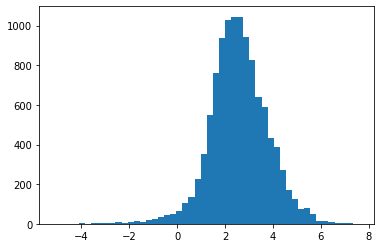

In [106]:
difference = heur_data['QGRS'] - heur_data['QPrivate'] - heur_data['QPlant']
_ = plt.hist(difference, bins=50)

In [109]:
difference

array([3.3474426, 1.1966553, 3.8134995, ..., 2.5928478, 2.8594704,
       1.8619347], dtype=float32)

### Physical model of gas flow

In [120]:
import pickle

class GasNCity():
    def __init__(self, load_models=False):
        self.qp_cols = ['QGRS_1', 'QGRS_2', 'QPlant_1', 'QPlant_2', 'QPlant_3', 'QPlant_4',
                        'PGRS_1', 'PGRS_2', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7',
                        'P_8', 'P_9', 'Q_1', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'Q_6', 'Q_7']
        self.models = {}
        if load_models:
            for device in self.qp_cols:
                self.models[device] = pickle.load(open(f'{device}_model.sav', 'rb'))
    
    def predict(self, valves):
        valves = pd.DataFrame(valves)
        out_data = {}
        for device, model in self.models.items():
            if device.startswith('QGRS') or device.startswith('PGRS'):
                out_data[device] = model.predict(valves.values)
        
        df_grs = pd.DataFrame(out_data)
        valves_grs = valves.join(df_grs)
        for device, model in self.models.items():
            if not device.startswith('QGRS') and not device.startswith('PGRS'):
                out_data[device] = model.predict(valves_grs.values)
                
        out_df = pd.DataFrame(out_data)
        return out_df
    
    def init_models(self):
        lr_devices = ['P_3', 'P_5', 'P_6', 'Q_4', 'Q_5']
        rf_devices = [dev for dev in self.qp_cols if dev not in lr_devices]
        for device in lr_devices:
            self.models[device] = LinearRegression()
        for device in rf_devices:
            self.models[device] = RandomForestRegressor(n_estimators=50, max_depth=10)
            
    def fit_models(self, data: pd.DataFrame):
        grs_data = data.drop(['QGRS_1', 'QGRS_2', 'PGRS_1', 'PGRS_2'], inplace=False)
        for device, model in self.models.items():
            if device.startswith('QGRS') or device.startswith('PGRS'):
                self.models[device] = model.fit(grs_data)
            else:
                self.models[device] = model.fit(data)
    
    def find_valves(self, pq):
        '''Optimize valve values to fit to the pq requirements'''
        return np.zeros((len(pq), 12))
    
    def validate_pq(self, pq):
        '''Validate if the given pq values sattisfy heuristic clippings'''
        return True
                